In [1]:
import pandas as pd
import numpy as np

# 可視化用のライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import neologdn
import MeCab

import re

In [2]:
df = pd.read_csv('all_text_wakatigaki.csv',encoding='utf-8')
df.head()

,surface,yomi,original,type,katsuyoukei,katsuyougata,内容
0,neologd,ネオログディー,NEologd,名詞-固有名詞-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
1,_,_,_,記号-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
2,tagger,タガー,tagger,名詞-固有名詞-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
3,.,.,.,記号-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
4,parse,パース,Parse,名詞-固有名詞-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...


## テキスト毎の単語数をカウント

In [3]:
# [内容]カラムでgroupbyを実行、[original]カラムをカウントする
text_word_cnt_df = df.groupby('内容')['original'].count().reset_index()
# 適切なカラム名に変更
text_word_cnt_df = text_word_cnt_df.rename(columns = {'original':'word_count'})

# 確認
text_word_cnt_df

,内容,word_count
0,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...,26
1,まずはparse()で分かち書きした単語群は1つの文字列型になっているので「\n」で区切り、...,30
2,原形、品詞などの間には「\t」が、分かち書きされた単語と単語の区切りには「\n」が表示される,33
3,次に邪魔な文字「\t」を省きたい。よって、split('\t')を使用したいがwakatid...,41


## テキスト毎の単語数を縦棒グラフで可視化

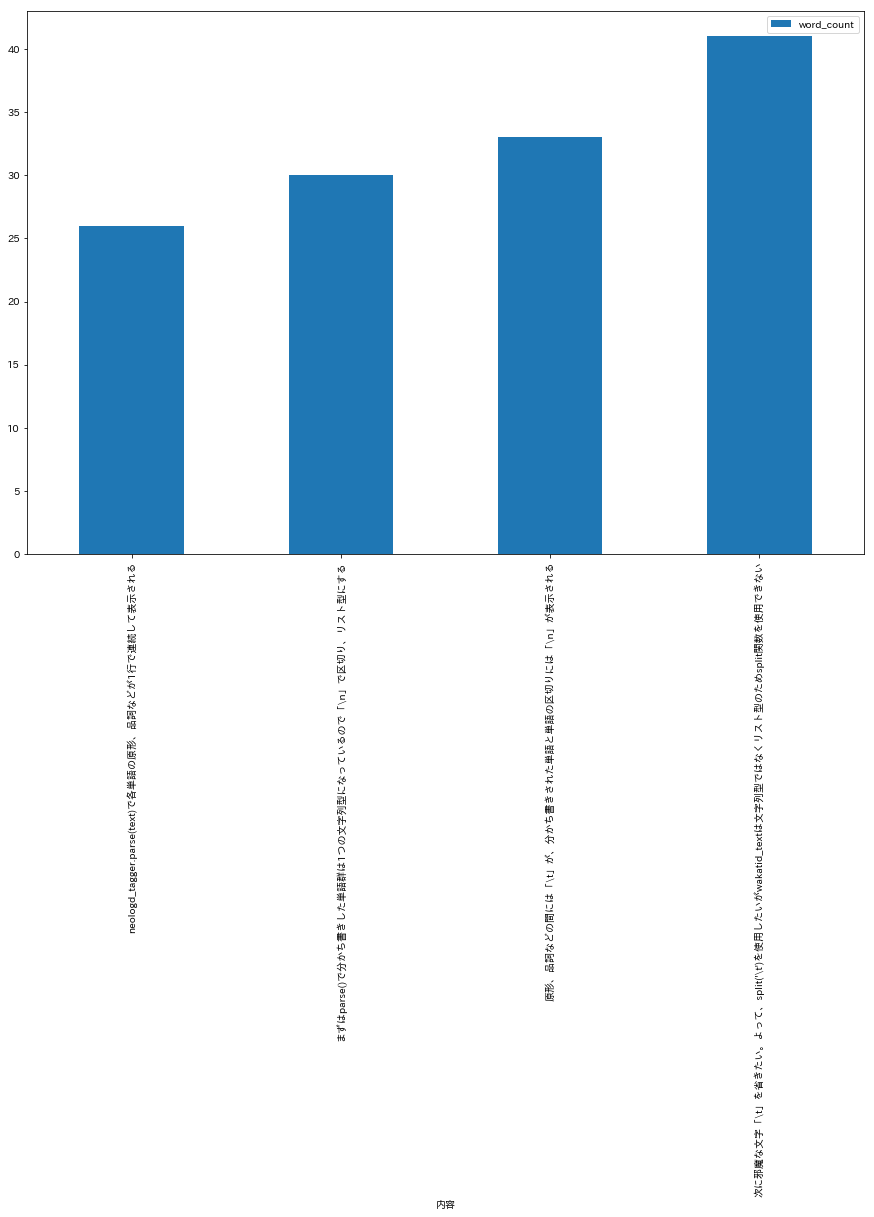

In [4]:
text_word_cnt_df.plot.bar(x='内容', figsize=(15,10))